In [5]:
import pandas as pd
from datetime import datetime
from datetime import date
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline 
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
data=pd.read_csv(r'C:\Users\bhush\OneDrive\Desktop\Project\fraudTrain.csv\fraudTrain.csv')

In [7]:
data=data.iloc[:,1:]

In [8]:
# Converting timestamp to Date and Time
data['Date'] = pd.to_datetime(data['trans_date_trans_time']).dt.date
data['Time'] = pd.to_datetime(data['trans_date_trans_time']).dt.time
data['Weekday'] = pd.to_datetime(data['trans_date_trans_time']).dt.day_name()

In [9]:
data.drop(['trans_date_trans_time'],axis=1,inplace=True)

In [10]:
data.head()

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,Date,Time,Weekday
0,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,...,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0,2019-01-01,00:00:18,Tuesday
1,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,...,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0,2019-01-01,00:00:44,Tuesday
2,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,...,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0,2019-01-01,00:00:51,Tuesday
3,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,MT,...,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0,2019-01-01,00:01:16,Tuesday
4,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,VA,...,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0,2019-01-01,00:03:06,Tuesday


In [11]:
data['Name']= data['first']+" "+data['last']

In [12]:
data=data[["Date","Time","Weekday","cc_num","merchant","category","amt","Name","gender","street","city","state","zip","lat","long","city_pop","job","dob","trans_num","unix_time","merch_lat","merch_long","is_fraud"]]

In [13]:
#data.drop(['lat','long','trans_num','unix_time','merch_lat','merch_long'],axis=1,inplace=True)


In [14]:
data.head()

,Date,Time,Weekday,cc_num,merchant,category,amt,Name,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01,00:00:18,Tuesday,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01,00:00:44,Tuesday,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01,00:00:51,Tuesday,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01,00:01:16,Tuesday,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01,00:03:06,Tuesday,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [15]:
len(data)

1296675

In [16]:
data.isna().sum()

Date          0
Time          0
Weekday       0
cc_num        0
merchant      0
category      0
amt           0
Name          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
dtype: int64

In [17]:
fraud=data[data['is_fraud']==1]
notfraud=data[data['is_fraud']==0]

In [18]:
len(notfraud)

1289169

In [19]:
sample_nf=notfraud.sample(frac=0.007,replace=True,random_state=1)

In [20]:
data_2=fraud.append(sample_nf)

### Exploratory Data Analysis

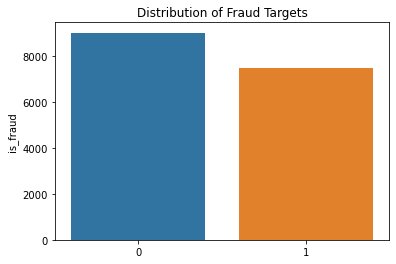

In [21]:
## Distribution of Targets
sns.barplot(x=[0,1], y=data_2['is_fraud'].value_counts()).set_title('Distribution of Fraud Targets')
plt.show()

In [22]:
len(notfraud)

1289169

#### We can see that the data is highly skewed hence we would sample the data to create datapoints for Fraud targets

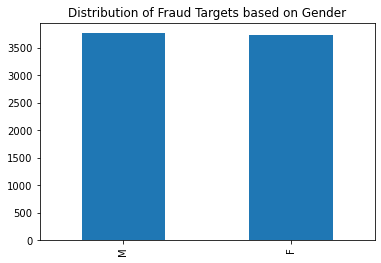

In [23]:
fraud['gender'].value_counts().plot.bar().set_title('Distribution of Fraud Targets based on Gender');
plt.show()

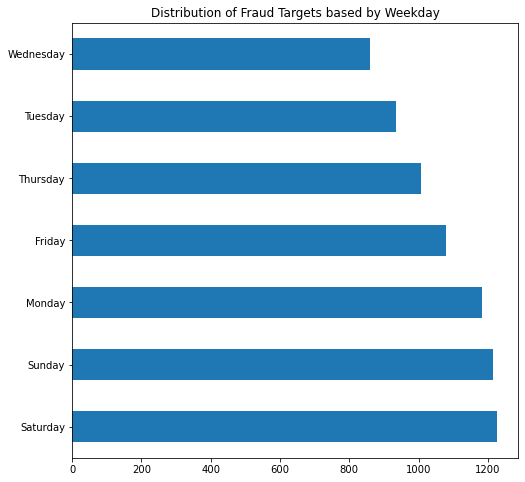

In [24]:
## Distribution of Fraud targets by Weekday

plt.figure(figsize=(8,8))
fraud['Weekday'].value_counts().plot.barh().set_title('Distribution of Fraud Targets based by Weekday');
plt.show()

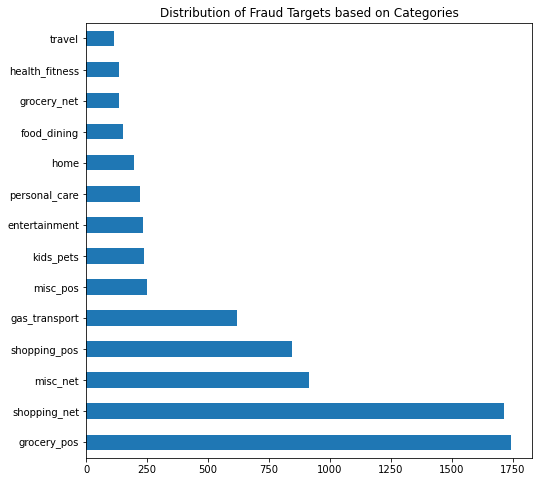

In [25]:

plt.figure(figsize=(8,8))
fraud['category'].value_counts().plot.barh().set_title('Distribution of Fraud Targets based on Categories');
plt.show()

In [26]:
data=data_2

### Feature Selection

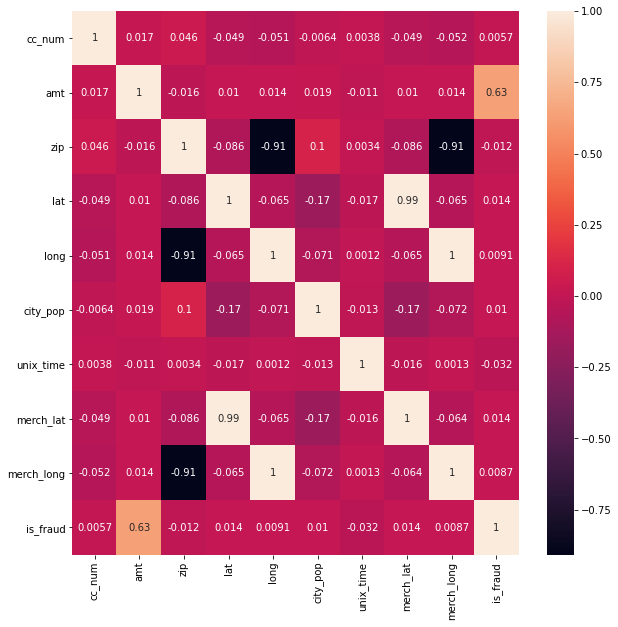

In [27]:
corrMatrix = data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [28]:
data_corr=data.corr()['is_fraud'].sort_values()
print('Most Positive Correlations:\n', data_corr.tail(5))
print('\nMost Negative Correlations:\n', data_corr.head(5))

Most Positive Correlations:
 city_pop     0.010152
merch_lat    0.013888
lat          0.014164
amt          0.634072
is_fraud     1.000000
Name: is_fraud, dtype: float64

Most Negative Correlations:
 unix_time    -0.031686
zip          -0.011952
cc_num        0.005740
merch_long    0.008726
long          0.009066
Name: is_fraud, dtype: float64


In [29]:
features=['merch_lat','lat','city_pop','amt','unix_time','zip','cc_num','long','merch_long','is_fraud']

In [30]:
data_1=data[features]

In [31]:
### Splitting the data into Train and target column data

X_train=data_1.drop(['is_fraud'],axis=1)
y=data_1['is_fraud']

In [32]:
### Splitting the train and test data into 80-20 split for model fitting

X_train, X_test, y_train, y_test = train_test_split(X_train, y, test_size=0.20, random_state=22) 

In [33]:
X_train

,merch_lat,lat,city_pop,amt,unix_time,zip,cc_num,long,merch_long
173701,35.174848,34.3795,34882,128.49,1333250954,91321,3566094707272327,-118.5230,-118.781514
701890,39.576222,38.8852,17558,774.88,1351293312,22124,38534201672254,-77.3233,-76.868149
430328,35.346495,35.0583,238602,70.65,1342071508,28314,3595192916105588,-79.0080,-78.735132
233449,25.794173,26.7197,459921,287.63,1335567983,33417,676245600876,-80.1248,-80.542552
74250,36.696174,36.0424,6006,4.68,1329089856,27258,3525590521269779,-79.3242,-78.425301
...,...,...,...,...,...,...,...,...,...
989174,37.557442,38.2586,9815,288.67,1360291077,22968,4099707841315751,-78.4074,-78.026147
91280,42.033248,41.0935,2644,51.60,1330034331,44412,3577578023716568,-81.0425,-81.137624
928302,40.350417,41.0442,5950,163.75,1357227144,10962,340951438290556,-73.9609,-74.898278
55071,42.613670,42.8511,3032,41.64,1328208800,50421,4302475216404898,-93.6200,-93.035800


Text(0, 0.5, 'Error Rate')

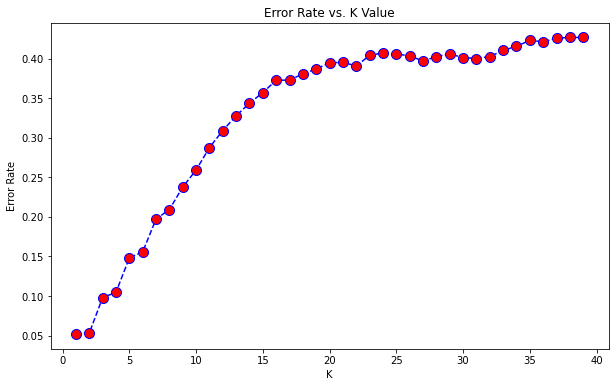

In [57]:
## Creating the model and fitting our data to it
error_rate = []
for i in range(1,40):
 classifier = KNeighborsClassifier(n_neighbors=i,p=1)
 classifier.fit(X_train,y_train)
 y_pred = classifier.predict(X_test)
 error_rate.append(np.mean(y_pred != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')


In [58]:
classifier = KNeighborsClassifier(n_neighbors=1,p=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)
score_knn=metrics.accuracy_score(y_test, y_pred)
score_knn=round(score_knn*100,2)
# Model Accuracy, how often is the classifier correct?
print("KNN Accuracy: " , score_rf)

KNN Accuracy:  91.35


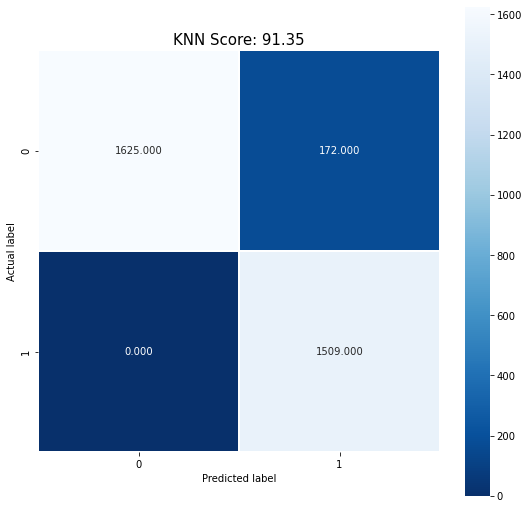

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Score: {0}'.format(score_rf)
plt.title(all_sample_title, size = 15);

### Random Forest Classifier

In [34]:
# Creating the random forest model and predicting our results on it

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.model_selection import GridSearchCV
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
from sklearn import metrics
score_rf=metrics.accuracy_score(y_test, y_pred)
score_rf=round(score_rf*100,2)
# Model Accuracy, how often is the classifier correct?
print("Random Forest Classifier Accuracy: " , score_rf)

Random Forest Classifier Accuracy:  91.35


### Loss function for Random Forest 

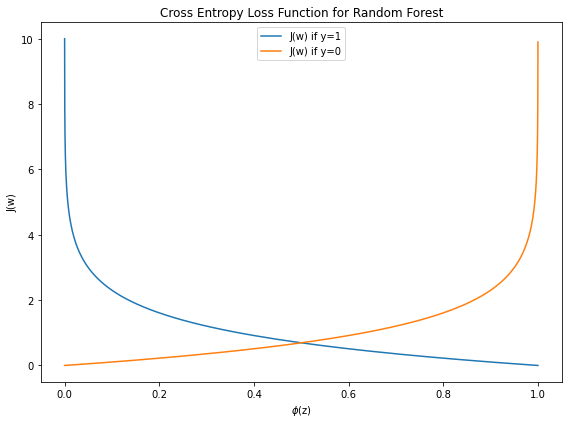

In [36]:
## We again use Mean squred error as our loss function

import numpy as np
import matplotlib.pyplot as plt
 
'''
Hypothesis Function - Sigmoid function
'''
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
 
'''
yHat represents the predicted value / probability value calculated as output of hypothesis / sigmoid function
 
y represents the actual label
'''
def cross_entropy_loss(y_pred, y_test):
    if y_test == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)


# Calculate sample values for Z
#
z = np.arange(-10, 10, 0.1)
#
# Calculate the hypothesis value / probability value
#
h_z = sigmoid(z)
#
# Value of cost function when y = 1
# -log(h(x))
#
cost_1 = cross_entropy_loss(h_z, 1)
#
# Value of cost function when y = 0
# -log(1 - h(x))
#
cost_0 = cross_entropy_loss(h_z, 0)
#
# Plot the cross entropy loss
#
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='J(w) if y=1')
plt.plot(h_z, cost_0, label='J(w) if y=0')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.title('Cross Entropy Loss Function for Random Forest')
plt.tight_layout()
plt.show()

### Confusion Matrix for Random Forest

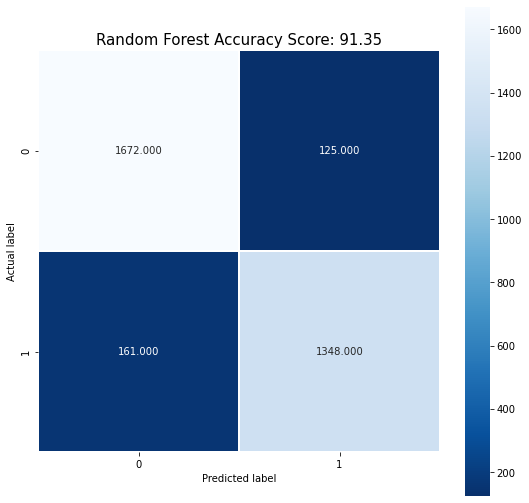

In [37]:
## Plotting confusion matrix to visualize our findings

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Accuracy Score: {0}'.format(score_rf)
plt.title(all_sample_title, size = 15);

### XG Boost Classifier

In [38]:
### We specify the parameters to be used

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [39]:
classifier=xgboost.XGBClassifier()
random_search=RandomizedSearchCV(classifier,param_distributions=params,n_iter=10,scoring='accuracy',n_jobs=-1,cv=5,verbose=3)
random_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[20:00:37] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           random_state=None, reg_alpha=None,
                                           reg_lambda=None,
                                           

In [40]:

random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.25, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [41]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.25,
 'gamma': 0.0,
 'colsample_bytree': 0.5}

In [42]:
### Use the best Parameters

classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.3, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.3, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=np.nan, monotone_constraints='()',
              n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [43]:
## Calculate the accuracy of the model
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=5)
print("XGBoost Accuracy: ",round(score.mean()*100,2))

[20:00:38] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:40] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:41] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:00:43] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation me

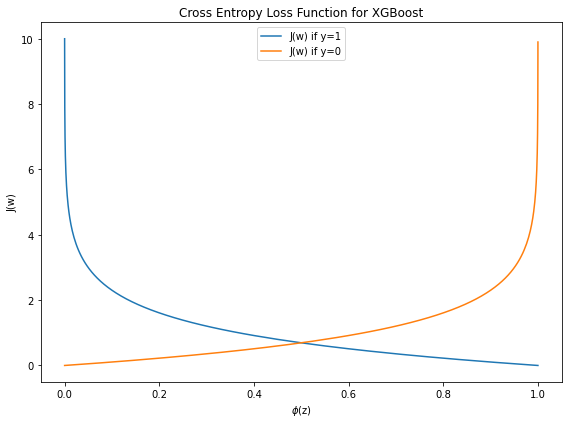

In [46]:
## We again use Mean squred error as our loss function

import numpy as np
import matplotlib.pyplot as plt
 
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))
def cross_entropy_loss(y_pred, y_test):
    if y_test == 1:
      return -np.log(y_pred)
    else:
      return -np.log(1 - y_pred)


# Calculate sample values for Z
#
z = np.arange(-10, 10, 0.1)
#
# Calculate the hypothesis value / probability value
#
h_z = sigmoid(z)
#
# Value of cost function when y = 1
# -log(h(x))
#
cost_1 = cross_entropy_loss(h_z, 1)
#
# Value of cost function when y = 0
# -log(1 - h(x))
#
cost_0 = cross_entropy_loss(h_z, 0)
#
# Plot the cross entropy loss
#
fig, ax = plt.subplots(figsize=(8,6))
plt.plot(h_z, cost_1, label='J(w) if y=1')
plt.plot(h_z, cost_0, label='J(w) if y=0')
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.title('Cross Entropy Loss Function for XGBoost')
plt.tight_layout()
plt.show()

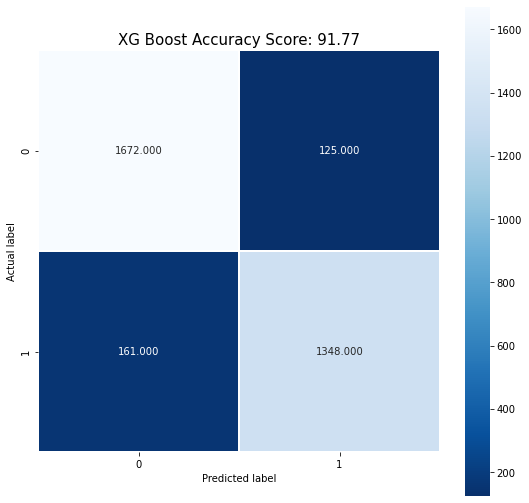

In [44]:
### Plot our findings using the Confusion Matrix

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'XG Boost Accuracy Score: {0}'.format(round(score.mean()*100,2))
plt.title(all_sample_title, size = 15);